#  Train custom dataset in coco format

Import all stuffs :

In [59]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import os
import numpy as np
import json
from detectron2.structures import BoxMode

Register your datas in coco format :

In [12]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("jeton", {}, "images/jeton/jeton_json.json", "images/jeton")

In case you want to register again your Dataset, you need to clear dataset before :

In [11]:
DatasetCatalog.clear()

To check your dataset is correctly registered :

In [21]:
jeton_metadata = MetadataCatalog.get("jeton")

In [15]:
DatasetCatalog.get("jeton")

[03/28 12:56:00 d2.data.datasets.coco]: Loaded 15 images in COCO format from images/jeton/jeton_json.json


[{'annotations': [{'bbox': [0, 9, 639, 18],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': False,
    'segmentation': [[639.1, 8.8, 639.1, 27.4, 0, 27.4, 0, 8.8]]},
   {'bbox': [1, 68, 637, 17],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': False,
    'segmentation': [[637.8, 67.7, 637.8, 85, 1.3, 85, 1.3, 67.7]]},
   {'bbox': [1, 130, 639, 18],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': False,
    'segmentation': [[639.7, 129.9, 639.7, 147.8, 1.3, 147.8, 1.3, 129.9]]},
   {'bbox': [0, 193, 639, 16],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': False,
    'segmentation': [[639.1, 192.6, 639.1, 208.6, 0, 208.6, 0, 192.6]]},
   {'bbox': [1, 250, 637, 16],
    'bbox_mode': <BoxMode.XYWH_ABS: 1>,
    'category_id': 0,
    'iscrowd': False,
    'segmentation': [[637.8, 250.2, 637.8, 266.3, 1.3, 266.3, 1.3, 250.2]]},
   {'bbox': [3, 309, 634, 18],
    'bbox_mode': <B

Check if your images are correctly labeled :

[03/28 13:59:34 d2.data.datasets.coco]: Loaded 15 images in COCO format from images/jeton/jeton_json.json


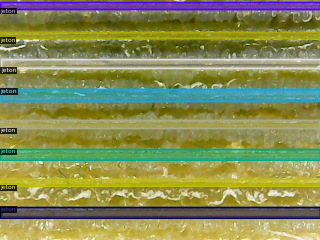

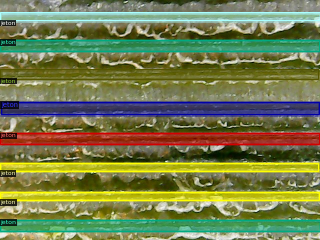

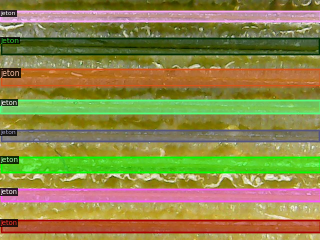

In [26]:
for d in random.sample(DatasetCatalog.get("jeton"), 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=jeton_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [29]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("jeton",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml") 
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset;
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (jeton)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)

[03/28 14:03:09 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[03/28 14:03:09 d2.data.datasets.coco]: Loaded 15 images in COCO format from images/jeton/jeton_json.json
[03/28 14:03:09 d2.data.build]: Removed 0 images with no usable annotations. 15 images left.
[03/28 14:03:09 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|   jeton    | 120          |
|            |              |
[03/28 14:03:09 d2.data.common]: Serializing 15 elements to byte tensors and concatenating them all ...
[03/28 14:03:09 d2.data.common]: Serialized dataset takes 0.02 MiB
[03/28 14:03:09 d2.data.detection_utils]: TransformGens used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[03/28 14:03:09 d2.data.build]: Using training sampler TrainingSampler


model_final_f10217.pkl: 178MB [00:15, 11.3MB/s]                              
'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (2, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (2,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (4, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (4,) in the model! Skipped.
'roi_heads.mask_head.predictor.weight' has shape (80, 256, 1, 1) in the checkpoint but (1, 256, 1, 1) in the model! Skipped.
'roi_heads.mask_head.predictor.bias' has shape (80,) in the checkpoint but (1,) in the model! Skipped.


In [62]:
trainer.train()

[03/28 14:49:04 d2.engine.train_loop]: Starting training from iteration 0
[03/28 14:49:18 d2.utils.events]:  eta: 0:03:14  iter: 19  total_loss: 1.579  loss_cls: 0.216  loss_box_reg: 0.665  loss_mask: 0.337  loss_rpn_cls: 0.030  loss_rpn_loc: 0.344  time: 0.6928  data_time: 0.0053  lr: 0.000080  max_mem: 2854M
ERROR [03/28 14:49:18 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/home/appuser/detectron2_repo/detectron2/engine/train_loop.py", line 133, in train
    self.after_step()
  File "/home/appuser/detectron2_repo/detectron2/engine/train_loop.py", line 154, in after_step
    h.after_step()
  File "/home/appuser/detectron2_repo/detectron2/engine/hooks.py", line 169, in after_step
    writer.write()
  File "/home/appuser/detectron2_repo/detectron2/utils/events.py", line 100, in write
    self._file_handle.write(json.dumps(to_save, sort_keys=True) + "\n")
ValueError: I/O operation on closed file.
[03/28 14:49:18 d2.engine.hooks]: Overall t

AttributeError: _func

Register my Dataset for validation :

In [32]:
register_coco_instances("jeton_val", {}, "", "images/jeton/val")

Make new predictor for testing your new weights :

In [33]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("jeton_val", )
predictor = DefaultPredictor(cfg)

In [ ]:
for d in random.sample(DatasetCatalog.get("jeton"), 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=jeton_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [54]:
import glob
path = './images/jeton/val/'
files = [f for f in glob.glob(path + "*.*", recursive=True)]

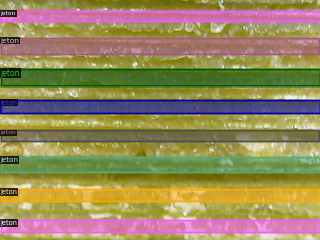

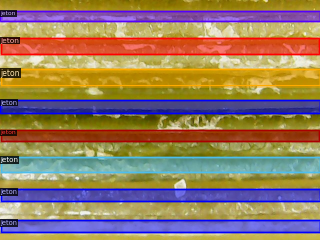

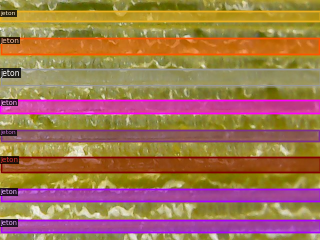

In [55]:
for i in random.sample(files, 3):
    img = cv2.imread(i)
    visualizer = Visualizer(img[:, :, ::-1], metadata=jeton_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [56]:
%load_ext tensorboard

In [61]:
%tensorboard --logdir output

Reusing TensorBoard on port 6006 (pid 112), started 0:00:18 ago. (Use '!kill 112' to kill it.)

<IPython.core.display.Javascript object>